In [86]:
import numpy as np 
import pandas as pd 
import math
from datetime import datetime

In [87]:
df = pd.read_csv("waypoints230820221046-robot-dlo-odom_node-pose.csv")
df.columns.values

array(['time', '.header.seq', '.header.stamp.secs', '.header.stamp.nsecs',
       '.header.frame_id', '.pose.position.x', '.pose.position.y',
       '.pose.position.z', '.pose.orientation.x', '.pose.orientation.y',
       '.pose.orientation.z', '.pose.orientation.w'], dtype=object)

In [88]:
df.rename(columns = {'.pose.position.x':'PosX', '.pose.position.y':'PosY' ,'.pose.position.z':'PosZ' , '.pose.orientation.x':'OrX','.pose.orientation.y':'OrY','.pose.orientation.z':'OrZ','.pose.orientation.w':'OrW'}, inplace = True)
df.head()

,time,.header.seq,.header.stamp.secs,.header.stamp.nsecs,.header.frame_id,PosX,PosY,PosZ,OrX,OrY,OrZ,OrW
0,2022/08/23/02:48:06.280794,23,1236,304239220,robot/odom,0.002169,0.000647,0.000752,0.000600,0.001062,-0.000184,0.999999
1,2022/08/23/02:48:06.389070,24,1236,404063310,robot/odom,0.005687,-0.001668,0.002374,0.000586,0.001013,0.000149,0.999999
2,2022/08/23/02:48:06.480939,25,1236,503803050,robot/odom,0.001876,-0.000447,0.000786,0.000558,0.000687,-0.000115,1.000000
3,2022/08/23/02:48:06.580436,26,1236,603568220,robot/odom,0.001842,-0.001086,0.001776,0.000537,0.001027,0.000062,0.999999
4,2022/08/23/02:48:06.684547,27,1236,703354290,robot/odom,0.001936,-0.000438,0.003570,0.000518,0.000998,0.000054,0.999999


In [89]:
df.drop(['.header.seq', '.header.stamp.secs', '.header.stamp.nsecs','.header.frame_id' ], inplace=True, axis=1)
df.head()

,time,PosX,PosY,PosZ,OrX,OrY,OrZ,OrW
0,2022/08/23/02:48:06.280794,0.002169,0.000647,0.000752,0.000600,0.001062,-0.000184,0.999999
1,2022/08/23/02:48:06.389070,0.005687,-0.001668,0.002374,0.000586,0.001013,0.000149,0.999999
2,2022/08/23/02:48:06.480939,0.001876,-0.000447,0.000786,0.000558,0.000687,-0.000115,1.000000
3,2022/08/23/02:48:06.580436,0.001842,-0.001086,0.001776,0.000537,0.001027,0.000062,0.999999
4,2022/08/23/02:48:06.684547,0.001936,-0.000438,0.003570,0.000518,0.000998,0.000054,0.999999


In [90]:
df['time']= df['time'].apply(lambda x: datetime.strptime(x.strip(), '%Y/%m/%d/%H:%M:%S.%f'))
df.head()

,time,PosX,PosY,PosZ,OrX,OrY,OrZ,OrW
0,2022-08-23 02:48:06.280794,0.002169,0.000647,0.000752,0.000600,0.001062,-0.000184,0.999999
1,2022-08-23 02:48:06.389070,0.005687,-0.001668,0.002374,0.000586,0.001013,0.000149,0.999999
2,2022-08-23 02:48:06.480939,0.001876,-0.000447,0.000786,0.000558,0.000687,-0.000115,1.000000
3,2022-08-23 02:48:06.580436,0.001842,-0.001086,0.001776,0.000537,0.001027,0.000062,0.999999
4,2022-08-23 02:48:06.684547,0.001936,-0.000438,0.003570,0.000518,0.000998,0.000054,0.999999


In [91]:
Roll = [] 
Pitch = [] 
Yaw = [] 
roll_x = 0 
pitch_y = 0
yaw_z = 0

for i in range (df.shape[0]):
    t0 = +2.0 * (df.OrW[i] * df.OrX[i]  +  df.OrY[i] * df.OrZ[i])
    t1 = +1.0 - 2.0 * (df.OrX[i] * df.OrX[i] + df.OrY[i] * df.OrY[i])
    roll_x = math.atan2(t0, t1)
    t2 = +2.0 * (df.OrW[i] * df.OrY[i] - df.OrZ[i] * df.OrX[i])
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    pitch_y = math.asin(t2)
    t3 = +2.0 * (df.OrW[i] * df.OrZ[i]  + df.OrX[i] * df.OrY[i])
    t4 = +1.0 - 2.0 * (df.OrY[i] *df.OrY[i] + df.OrZ[i] * df.OrZ[i])
    yaw_z = math.atan2(t3, t4)
    
    Roll.append(roll_x)
    Pitch.append(pitch_y)
    Yaw.append(yaw_z)

df['Roll'] = Roll
df['Pitch'] = Pitch
df['Yaw'] = Yaw


In [92]:
timeStamp = []
t = []
for idx , (currentT , currentPx, currentPy) in enumerate (zip(df.time ,df.PosX, df.PosY)):
   
    currentT = currentT.timestamp() #- df.time[0].timestamp()
   
    timeStamp.append((currentT)) # in mins
    t.append(currentT-timeStamp[0])
    
    lastT  = currentT 

df['t'] = t


In [93]:
df.head()

,time,PosX,PosY,PosZ,OrX,OrY,OrZ,OrW,Roll,Pitch,Yaw,t
0,2022-08-23 02:48:06.280794,0.002169,0.000647,0.000752,0.000600,0.001062,-0.000184,0.999999,0.001200,0.002125,-0.000366,0.000000
1,2022-08-23 02:48:06.389070,0.005687,-0.001668,0.002374,0.000586,0.001013,0.000149,0.999999,0.001172,0.002026,0.000299,0.108276
2,2022-08-23 02:48:06.480939,0.001876,-0.000447,0.000786,0.000558,0.000687,-0.000115,1.000000,0.001116,0.001373,-0.000228,0.200145
3,2022-08-23 02:48:06.580436,0.001842,-0.001086,0.001776,0.000537,0.001027,0.000062,0.999999,0.001074,0.002053,0.000124,0.299642
4,2022-08-23 02:48:06.684547,0.001936,-0.000438,0.003570,0.000518,0.000998,0.000054,0.999999,0.001037,0.001996,0.000110,0.403753


In [94]:
import math 
import matplotlib.pyplot as plt
import datetime 

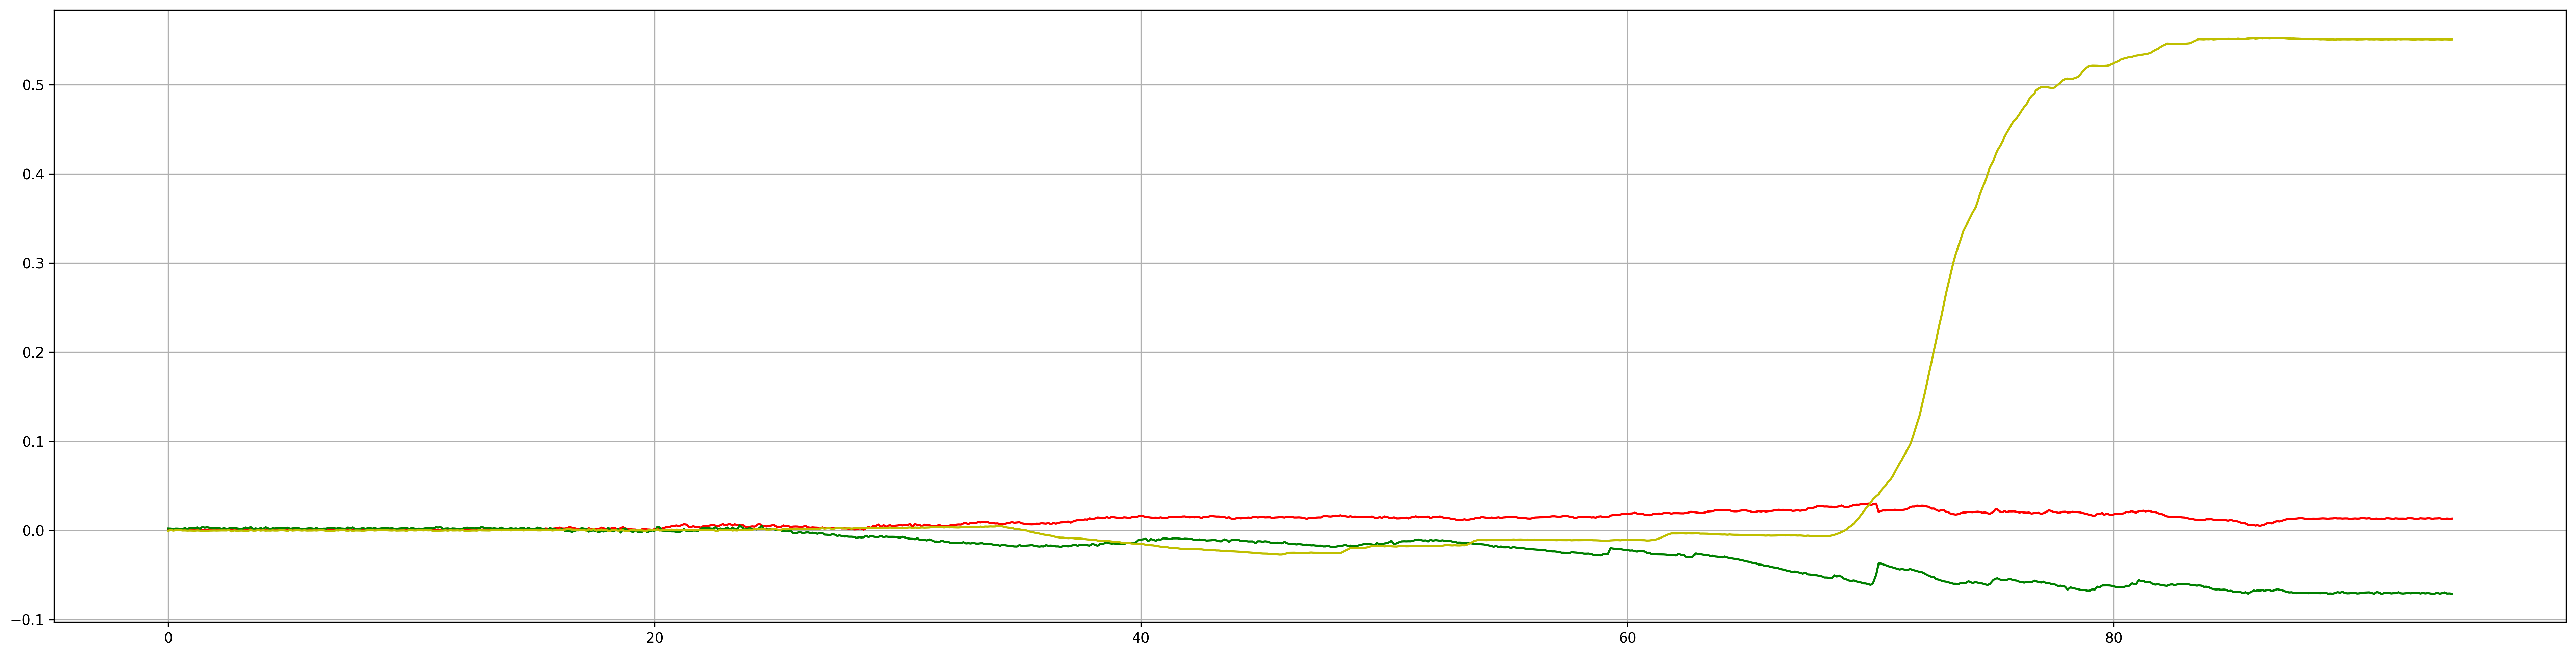

In [97]:
plt.figure(dpi=300, figsize=(32,8))
plt.grid()
plt.plot(t, Roll , color='r' )
plt.plot(t, Pitch , color = 'g')
plt.plot(t, Yaw , color = 'y')